In [2]:
import pandas as pd

In [46]:
Educ = pd.read_csv("Data/School enrollement.csv")
Inflation = pd.read_csv("Data/inflation.csv")
gdp = pd.read_csv("Data/gdp afr.csv")
gini = pd.read_csv("Data/gini afr.csv")
trade = pd.read_csv("Data/Trade afr.csv")
unemployment_rate = pd.read_csv("Data/unemployment rate.csv")
covid = pd.read_csv('Data/covid-data.csv')


In [47]:
# Convert the wide format data into a long format
Unemp_rate = pd.melt(unemployment_rate, id_vars=["Country Name"],
                    var_name="Year", value_name="Unemployment Rate")
# Convert year from string to numeric
Unemp_rate['Year'] = pd.to_numeric(Unemp_rate['Year'], errors='coerce')

# Convert the wide format data into a long format
gini_ = pd.melt(gini, id_vars=["Country Name"],
                    var_name="Year", value_name="gini Index")
# Convert year from string to numeric
gini_['Year'] = pd.to_numeric(gini_['Year'], errors='coerce')

# Convert the wide format data into a long format
gdp_ = pd.melt(gdp, id_vars=["Country Name"],
                    var_name="Year", value_name="GDP (current US$)")
# Convert year from string to numeric
gdp_['Year'] = pd.to_numeric(gdp_['Year'], errors='coerce')

# Convert the wide format data into a long format
Inflation_ = pd.melt(Inflation, id_vars=["Country Name"],
                    var_name="Year", value_name="Inflation, consumer prices (annual %)")
# Convert year from string to numeric
Inflation_['Year'] = pd.to_numeric(Inflation_['Year'], errors='coerce')

# Convert the wide format data into a long format
Educ_ = pd.melt(Educ, id_vars=["Country Name"],
                    var_name="Year", value_name="School enrollment, secondary ('%' gross)")
# Convert year from string to numeric
Educ_['Year'] = pd.to_numeric(Educ_['Year'], errors='coerce')

# Convert the wide format data into a long format
trade_ = pd.melt(trade, id_vars=["Country Name"],
                    var_name="Year", value_name="Trade (%' of GDP)")
# Convert year from string to numeric
trade_['Year'] = pd.to_numeric(trade_['Year'], errors='coerce')


In [48]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", 
    "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", 
    "Georgia", "India", "Indonesia", "Iran", "Iraq", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", 
    "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", 
    "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", 
    "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
    "Taiwan", "Tajikistan", "Thailand", "Timor-Leste (East Timor)", "Turkey", 
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]


In [49]:
# gdp.rename(columns={'Entity': 'Country'}, inplace=True)
# # gdp_per_capita.rename(columns={'Entity': 'Country'}, inplace=True)
# trade.rename(columns={'Entity': 'Country'}, inplace=True)
# gini.rename(columns={'Entity': 'Country'}, inplace=True)
# Educ.rename(columns={'Entity': 'Country'}, inplace=True)

In [50]:

Unemp_rate = Unemp_rate[Unemp_rate['Year'] >= 2016]
Inflation_ = Inflation_[Inflation_['Year'] >= 2016]
gdp_ = gdp_[gdp_['Year'] >= 2016]
Educ_ = Educ_[Educ_['Year'] >= 2016]
gini_ = gini_[gini_['Year'] >= 2016]
trade_ = trade_[trade_['Year'] >= 2016]

In [51]:
df_merged = Inflation_.merge(gini_, on=['Country Name', 'Year'], how= 'outer')
df_merged = df_merged.merge(gdp_, on=['Country Name', 'Year'],how= 'outer')
df_merged = df_merged.merge(Educ_, on=['Country Name', 'Year'], how= 'left')
df_merged = df_merged.merge(Unemp_rate, on=['Country Name', 'Year'], how= 'left')
df_merged = df_merged.merge(trade_, on=['Country Name', 'Year'], how= 'left')
df_merged['Year']= df_merged['Year'].astype(int)
df_merged.rename(columns={'Country Name': 'Location', 'GDP (current US$)': 'GDP', "School enrollment, secondary ('%' gross)":'School enrollment', 'Inflation, consumer prices (annual %)': 'Inflation'}, inplace=True)
dfmer = df_merged.sort_values(by='Location')


In [52]:
df_africains = dfmer[dfmer['Location'].isin(african_countries)]
df_africains['continent'] = 'Africa'
df_asia = dfmer[dfmer['Location'].isin(asian_countries)]
df_asia['continent'] = 'Asia'

df_africains

C:\Users\pc\AppData\Local\Temp\ipykernel_6372\4094785477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africains['continent'] = 'Africa'
C:\Users\pc\AppData\Local\Temp\ipykernel_6372\4094785477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['continent'] = 'Asia'


,Location,Year,Inflation,gini Index,GDP,School enrollment,Unemployment Rate,Trade (%' of GDP),continent
1656,Algeria,2022,9.265516,NaN,194998000000.0,105.932548,12.491,59.042284,Africa
858,Algeria,2019,1.951768,NaN,171760000000.0,NaN,12.275,51.809738,Africa
326,Algeria,2017,5.591116,NaN,170097000000.0,NaN,12.0,55.321403,Africa
1390,Algeria,2021,7.226063,NaN,163472000000.0,NaN,13.729,53.195527,Africa
60,Algeria,2016,6.397695,NaN,160034000000.0,NaN,10.2,55.925668,Africa
...,...,...,...,...,...,...,...,...,...
1595,Zimbabwe,2021,98.546105,NaN,28371238666.0,NaN,9.54,50.847128,Africa
1329,Zimbabwe,2020,557.201817,NaN,21509698407.0,NaN,8.651,47.313365,Africa
1063,Zimbabwe,2019,255.304991,50.3,21832234921.0,NaN,7.37,55.795961,Africa
265,Zimbabwe,2016,-1.54367,NaN,20548678100.0,NaN,5.918,51.219025,Africa


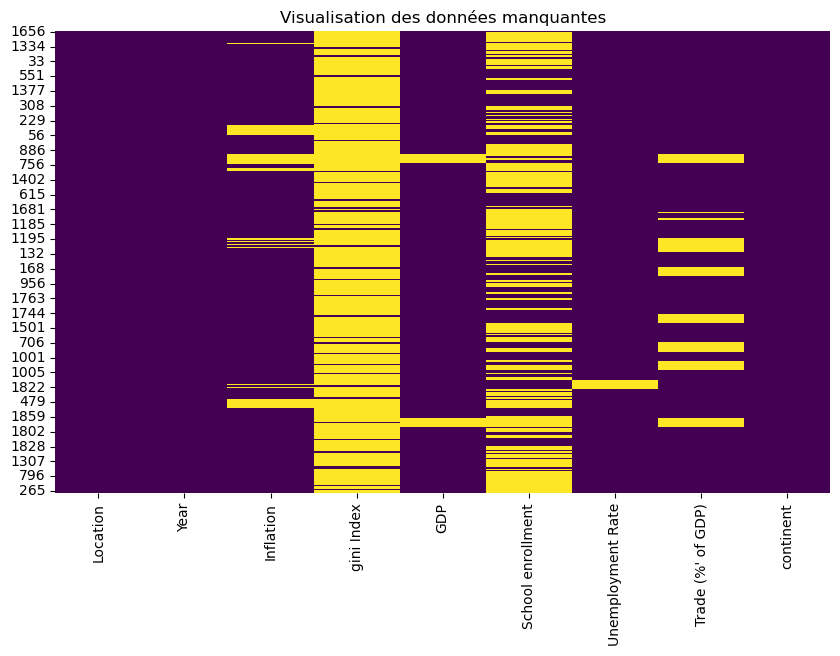

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_africains.isnull(), cbar=False, cmap='viridis')

plt.title('Visualisation des données manquantes')
plt.show()

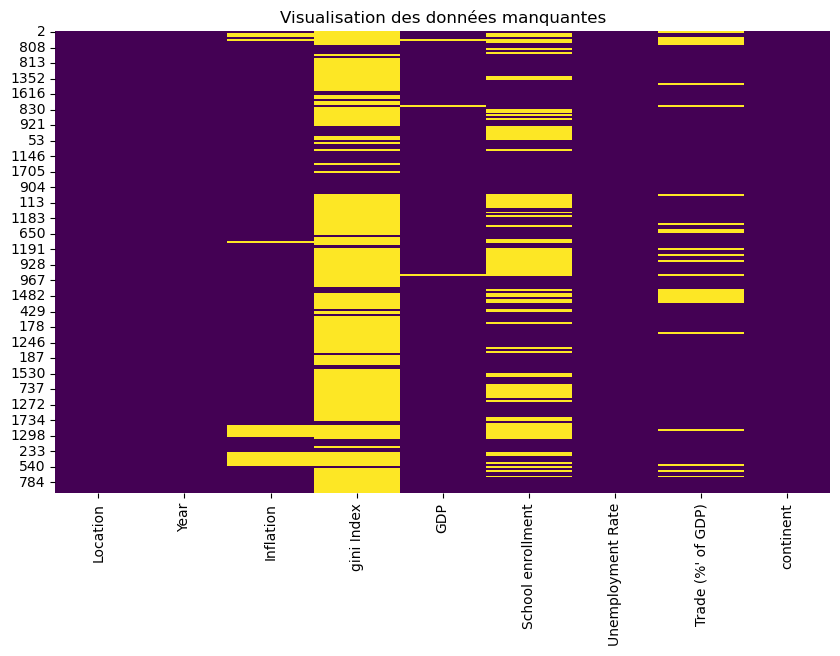

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_asia.isnull(), cbar=False, cmap='viridis')

plt.title('Visualisation des données manquantes')
plt.show()

In [55]:
pays_as_nan = df_asia[df_asia['School enrollment'].isna()]
pays_af_nan = df_africains[df_africains['School enrollment'].isna()]
df_africains.info

print(len(pays_af_nan['Location']),len(pays_as_nan['Location']))

191 82


In [56]:
from sklearn.impute import KNNImputer

columnas_para_imputar = ['Inflation', 'gini Index', 'GDP', 'School enrollment',	'Unemployment Rate',"Trade (%' of GDP)"]
imputador = KNNImputer(n_neighbors=5)
datos_para_imputar = df_africains[columnas_para_imputar]
df_afr_imputed = imputador.fit_transform(datos_para_imputar)
df_afr_imputed_df = pd.DataFrame(df_afr_imputed, columns=columnas_para_imputar)

df_africains[columnas_para_imputar] = df_afr_imputed

C:\Users\pc\AppData\Local\Temp\ipykernel_6372\3266017660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africains[columnas_para_imputar] = df_afr_imputed


In [57]:
from sklearn.impute import KNNImputer

columnas_para_imputar = ['Inflation', 'gini Index', 'GDP', 'School enrollment',	'Unemployment Rate',"Trade (%' of GDP)"]
imputador = KNNImputer(n_neighbors=5)
datos_para_imputar1 = df_asia[columnas_para_imputar]
df_as_imputed = imputador.fit_transform(datos_para_imputar1)
df_as_imputed_df = pd.DataFrame(df_as_imputed, columns=columnas_para_imputar)

df_asia[columnas_para_imputar] = df_as_imputed

C:\Users\pc\AppData\Local\Temp\ipykernel_6372\2077595766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia[columnas_para_imputar] = df_as_imputed


In [58]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html
from dash import dcc


df_clustering = df_africains.select_dtypes(include=['float64', 'int64'])

df_clustering = df_clustering.fillna(df_clustering.mean())

scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Silhouette score 
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled)
    score = calinski_harabasz_score(df_clustering_scaled, kmeans.labels_)
    silhouette_scores.append(score)


kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(df_clustering_scaled)

df_africains['Cluster'] = kmeans_final.labels_
df_africains

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,Location,Year,Inflation,gini Index,GDP,School enrollment,Unemployment Rate,Trade (%' of GDP),continent,Cluster
1656,Algeria,2022,9.265516,42.16,1.949980e+11,105.932548,12.491,59.042284,Africa,3
858,Algeria,2019,1.951768,42.16,1.717600e+11,63.146516,12.275,51.809738,Africa,0
326,Algeria,2017,5.591116,42.16,1.700970e+11,63.146516,12.000,55.321403,Africa,0
1390,Algeria,2021,7.226063,42.16,1.634720e+11,63.146516,13.729,53.195527,Africa,0
60,Algeria,2016,6.397695,42.16,1.600340e+11,59.206646,10.200,55.925668,Africa,0
...,...,...,...,...,...,...,...,...,...,...
1595,Zimbabwe,2021,98.546105,43.64,2.837124e+10,44.276346,9.540,50.847128,Africa,0
1329,Zimbabwe,2020,557.201817,42.60,2.150970e+10,42.369874,8.651,47.313365,Africa,2
1063,Zimbabwe,2019,255.304991,50.30,2.183223e+10,42.369874,7.370,55.795961,Africa,2
265,Zimbabwe,2016,-1.543670,42.60,2.054868e+10,39.926550,5.918,51.219025,Africa,0


In [59]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html
from dash import dcc


df_clustering1 = df_asia.select_dtypes(include=['float64', 'int64'])

df_clustering1 = df_clustering1.fillna(df_clustering1.mean())

scaler = StandardScaler()
df_clustering_scaled1 = scaler.fit_transform(df_clustering1)

inertia1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled1)
    inertia1.append(kmeans.inertia_)

# Silhouette score 
silhouette_scores1 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled1)
    score = calinski_harabasz_score(df_clustering_scaled1, kmeans.labels_)
    silhouette_scores1.append(score)


kmeans_final1 = KMeans(n_clusters=4, random_state=42)
kmeans_final1.fit(df_clustering_scaled1)

df_asia['Cluster'] = kmeans_final1.labels_
df_asia

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,Location,Year,Inflation,gini Index,GDP,School enrollment,Unemployment Rate,Trade (%' of GDP),continent,Cluster
2,Afghanistan,2016,4.383892,34.58,1.811657e+10,53.506340,10.092,114.102105,Asia,0
1332,Afghanistan,2021,38.554802,31.14,1.426650e+10,95.384875,12.075,51.411716,Asia,0
1066,Afghanistan,2020,37.415108,33.58,1.995593e+10,89.115696,11.710,46.709895,Asia,0
268,Afghanistan,2017,4.975952,33.58,1.875346e+10,55.402149,11.180,112.226525,Asia,0
1598,Afghanistan,2022,5.731870,34.62,1.879770e+11,87.805816,14.100,27.512863,Asia,0
...,...,...,...,...,...,...,...,...,...,...
1848,Uzbekistan,2022,11.446644,33.88,8.039185e+10,88.796463,4.507,71.578945,Asia,2
518,Uzbekistan,2017,13.875743,33.88,6.208132e+10,93.589096,5.830,47.784659,Asia,2
1050,Uzbekistan,2019,14.525736,33.88,6.028350e+10,96.683311,4.920,72.518327,Asia,2
252,Uzbekistan,2016,8.130887,32.78,8.613829e+10,92.808411,5.160,29.192297,Asia,2


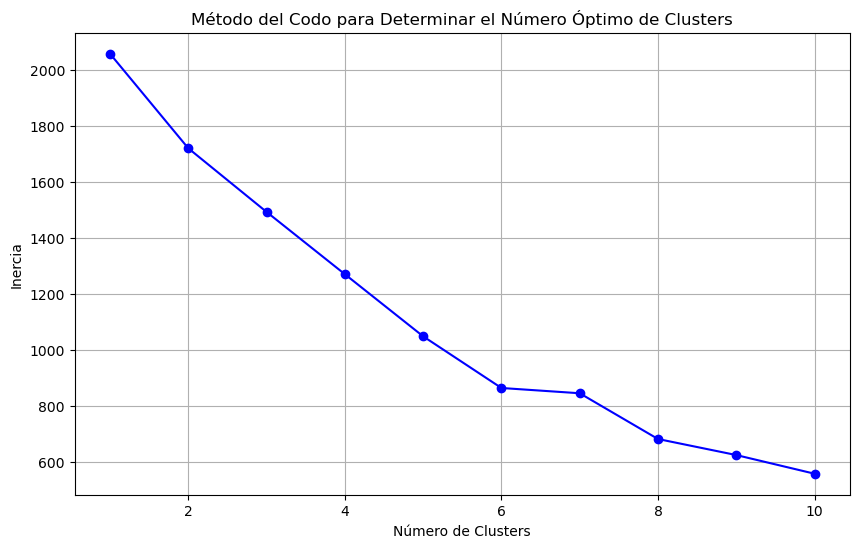

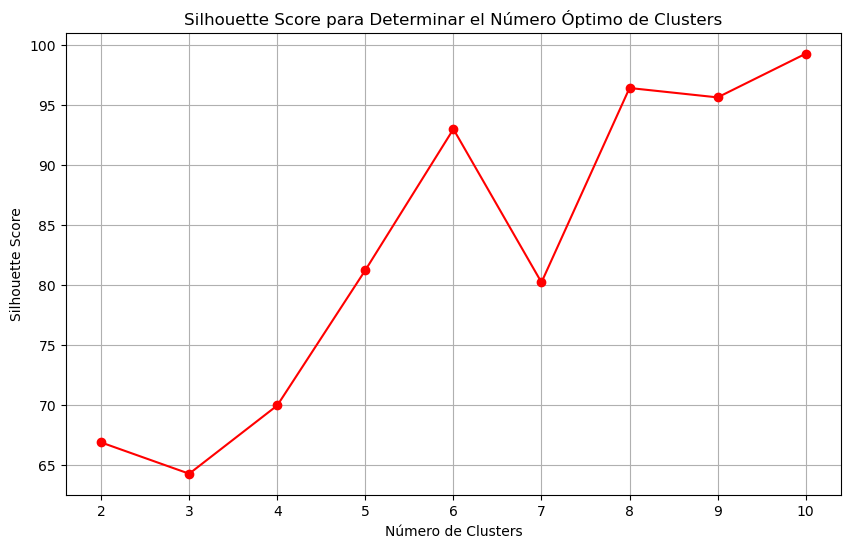

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

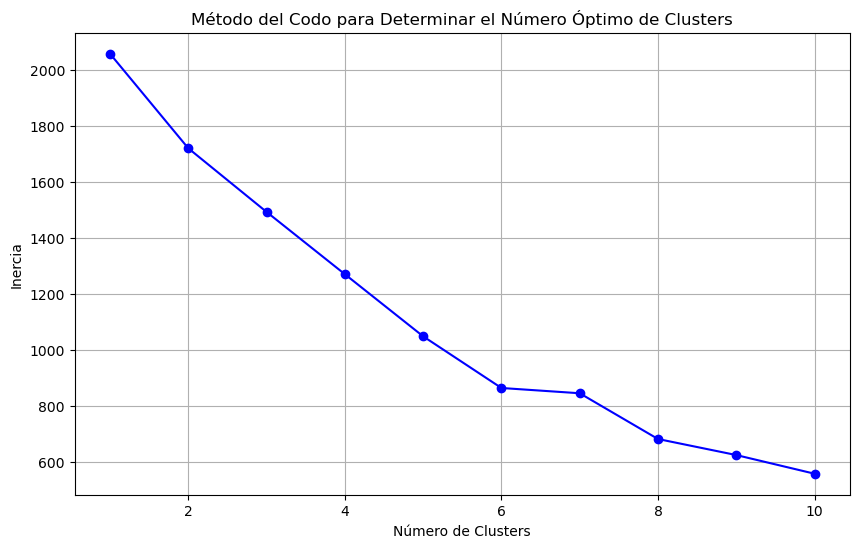

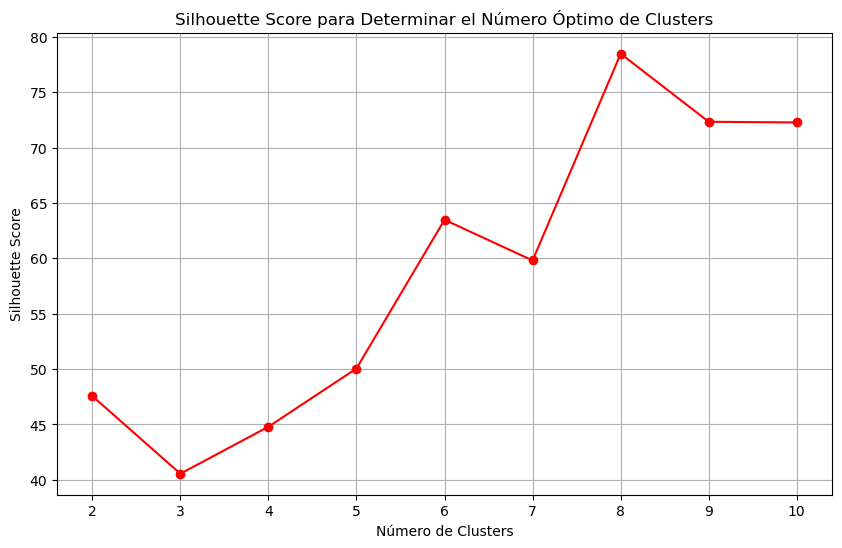

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores1, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

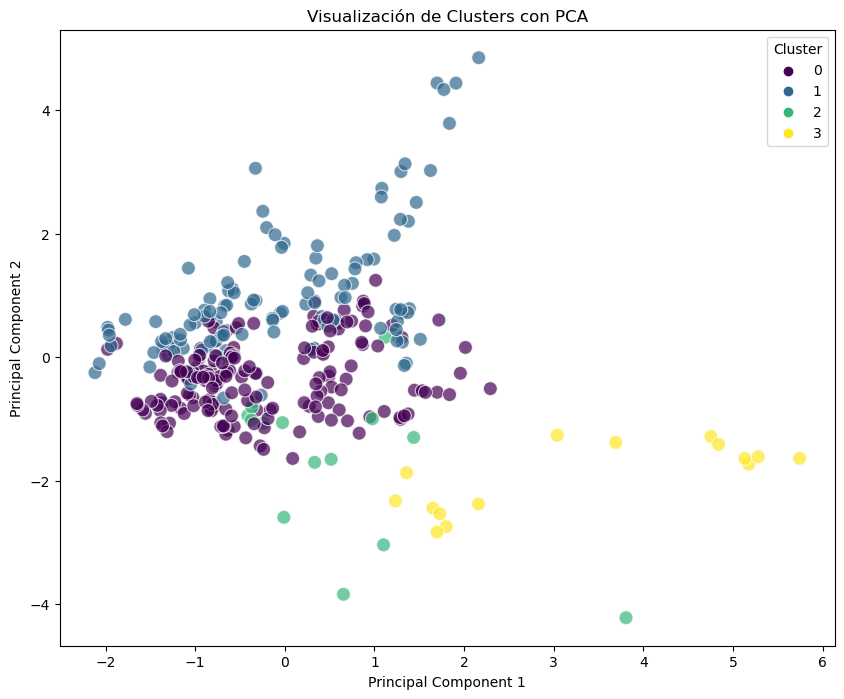

In [62]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

df_pca['Cluster'] = kmeans_final.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7, s=100)

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

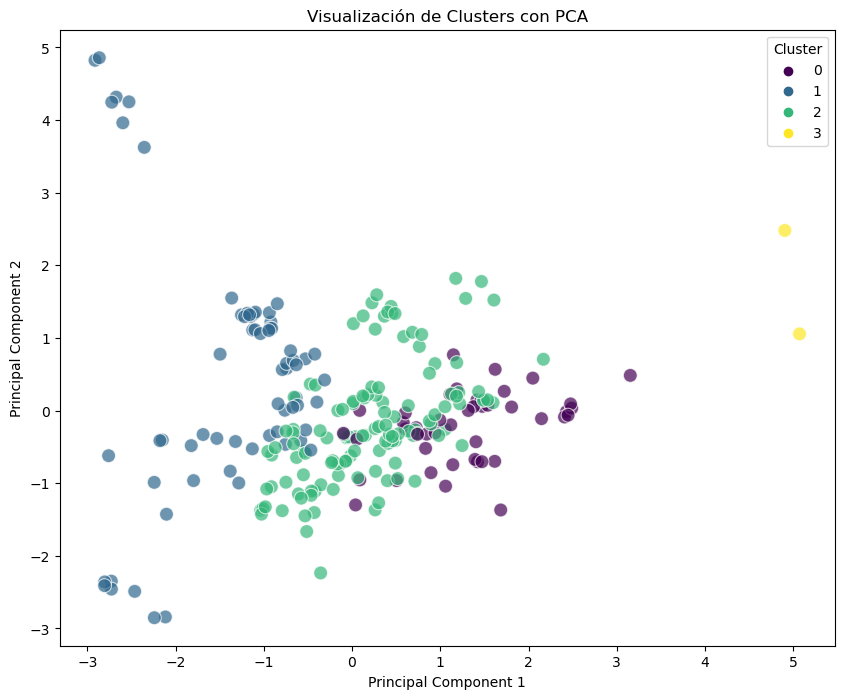

In [63]:
pca = PCA(n_components=2)
df_pca1 = pca.fit_transform(df_clustering_scaled1)

df_pca1 = pd.DataFrame(df_pca1, columns=['PC1', 'PC2'])

df_pca1['Cluster'] = kmeans_final1.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca1, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7, s=100)

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [64]:
moda_clusters = df_africains.groupby('Location')['Cluster'].agg(pd.Series.mode)

clusters_moda_dict = moda_clusters.to_dict()

for key, value in clusters_moda_dict.items():
    if isinstance(value, pd.Series):
        clusters_moda_dict[key] = value.iloc[0]

print(clusters_moda_dict)

{'Algeria': 0, 'Angola': 0, 'Benin': 0, 'Botswana': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cabo Verde': 1, 'Cameroon': 0, 'Central African Republic': 0, 'Chad': 1, 'Comoros': 2, 'Djibouti': 1, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Eswatini': 0, 'Ethiopia': 0, 'Gabon': 0, 'Ghana': 0, 'Guinea': 1, 'Guinea-Bissau': 1, 'Kenya': 0, 'Lesotho': 1, 'Liberia': 1, 'Libya': 0, 'Madagascar': 1, 'Malawi': 1, 'Mali': 0, 'Mauritania': 0, 'Mauritius': 1, 'Morocco': 0, 'Mozambique': 0, 'Namibia': 1, 'Niger': 1, 'Nigeria': 3, 'Rwanda': 1, 'Sao Tome and Principe': 1, 'Senegal': 0, 'Seychelles': 1, 'Sierra Leone': 0, 'Somalia': 0, 'South Africa': 3, 'South Sudan': 1, 'Sudan': 0, 'Tanzania': 0, 'Togo': 0, 'Tunisia': 0, 'Uganda': 0, 'Zambia': 0, 'Zimbabwe': 0}


In [65]:
moda_clusters1 = df_asia.groupby('Location')['Cluster'].agg(pd.Series.mode)

clusters_moda_dict1 = moda_clusters1.to_dict()

for key, value in clusters_moda_dict1.items():
    if isinstance(value, pd.Series):
        clusters_moda_dict1[key] = value.iloc[0]

print(clusters_moda_dict1)

{'Afghanistan': 0, 'Armenia': 0, 'Azerbaijan': 2, 'Bahrain': 2, 'Bangladesh': 2, 'Bhutan': 2, 'Cambodia': 2, 'China': 1, 'Cyprus': 2, 'Georgia': 0, 'India': 2, 'Indonesia': 1, 'Iraq': 0, 'Japan': 1, 'Jordan': 0, 'Kazakhstan': 2, 'Kuwait': 2, 'Lebanon': 0, 'Malaysia': 1, 'Maldives': 2, 'Mongolia': 2, 'Nepal': 0, 'Oman': 2, 'Pakistan': 2, 'Philippines': 1, 'Qatar': 2, 'Saudi Arabia': 1, 'Singapore': 1, 'Sri Lanka': 2, 'Tajikistan': 2, 'Thailand': 1, 'Turkmenistan': 2, 'United Arab Emirates': 1, 'Uzbekistan': 2}


In [66]:
df_africains_renamed = df_africains.rename(columns={"Trade (%' of GDP)": 'trade','gini Index': 'GINI', 'Location': 'Entity'})
df_africains_renamed['poorest_decile_threshold'], df_africains_renamed['Education'], df_africains_renamed['median_income'], df_africains_renamed['richest_decile_threshold'] = 'NaN', 'NaN', 'NaN', 'NaN' 
df_africains_renamed = df_africains_renamed[['Entity','Year','trade', 'poorest_decile_threshold', 'GINI', 'Education', 'continent', 'median_income',	'GDP',	'richest_decile_threshold','Inflation', 'School enrollment', 'Unemployment Rate']]
df_africains_renamed

,Entity,Year,trade,poorest_decile_threshold,GINI,Education,continent,median_income,GDP,richest_decile_threshold,Inflation,School enrollment,Unemployment Rate
1656,Algeria,2022,59.042284,NaN,42.16,NaN,Africa,NaN,1.949980e+11,NaN,9.265516,105.932548,12.491
858,Algeria,2019,51.809738,NaN,42.16,NaN,Africa,NaN,1.717600e+11,NaN,1.951768,63.146516,12.275
326,Algeria,2017,55.321403,NaN,42.16,NaN,Africa,NaN,1.700970e+11,NaN,5.591116,63.146516,12.000
1390,Algeria,2021,53.195527,NaN,42.16,NaN,Africa,NaN,1.634720e+11,NaN,7.226063,63.146516,13.729
60,Algeria,2016,55.925668,NaN,42.16,NaN,Africa,NaN,1.600340e+11,NaN,6.397695,59.206646,10.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zimbabwe,2021,50.847128,NaN,43.64,NaN,Africa,NaN,2.837124e+10,NaN,98.546105,44.276346,9.540
1329,Zimbabwe,2020,47.313365,NaN,42.60,NaN,Africa,NaN,2.150970e+10,NaN,557.201817,42.369874,8.651
1063,Zimbabwe,2019,55.795961,NaN,50.30,NaN,Africa,NaN,2.183223e+10,NaN,255.304991,42.369874,7.370
265,Zimbabwe,2016,51.219025,NaN,42.60,NaN,Africa,NaN,2.054868e+10,NaN,-1.543670,39.926550,5.918


In [67]:
df_asia_renamed = df_asia.rename(columns={"Trade (%' of GDP)": 'trade','gini Index': 'GINI', 'Location': 'Entity'})
df_asia_renamed['poorest_decile_threshold'], df_asia_renamed['Education'], df_asia_renamed['median_income'], df_asia_renamed['richest_decile_threshold'] = 'NaN', 'NaN', 'NaN', 'NaN' 
df_asia_renamed = df_asia_renamed[['Entity','Year','trade', 'poorest_decile_threshold', 'GINI', 'Education', 'continent', 'median_income',	'GDP',	'richest_decile_threshold','Inflation', 'School enrollment', 'Unemployment Rate']]
df_asia_renamed

,Entity,Year,trade,poorest_decile_threshold,GINI,Education,continent,median_income,GDP,richest_decile_threshold,Inflation,School enrollment,Unemployment Rate
2,Afghanistan,2016,114.102105,NaN,34.58,NaN,Asia,NaN,1.811657e+10,NaN,4.383892,53.506340,10.092
1332,Afghanistan,2021,51.411716,NaN,31.14,NaN,Asia,NaN,1.426650e+10,NaN,38.554802,95.384875,12.075
1066,Afghanistan,2020,46.709895,NaN,33.58,NaN,Asia,NaN,1.995593e+10,NaN,37.415108,89.115696,11.710
268,Afghanistan,2017,112.226525,NaN,33.58,NaN,Asia,NaN,1.875346e+10,NaN,4.975952,55.402149,11.180
1598,Afghanistan,2022,27.512863,NaN,34.62,NaN,Asia,NaN,1.879770e+11,NaN,5.731870,87.805816,14.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,Uzbekistan,2022,71.578945,NaN,33.88,NaN,Asia,NaN,8.039185e+10,NaN,11.446644,88.796463,4.507
518,Uzbekistan,2017,47.784659,NaN,33.88,NaN,Asia,NaN,6.208132e+10,NaN,13.875743,93.589096,5.830
1050,Uzbekistan,2019,72.518327,NaN,33.88,NaN,Asia,NaN,6.028350e+10,NaN,14.525736,96.683311,4.920
252,Uzbekistan,2016,29.192297,NaN,32.78,NaN,Asia,NaN,8.613829e+10,NaN,8.130887,92.808411,5.160


In [81]:
df_as_afr = pd.concat([df_africains_renamed, df_asia_renamed])
dfasafr = df_as_afr.drop(columns='Education')
df_as_afr = dfasafr.rename(columns={'School enrollment':'Education'})

In [84]:
df_as_afr = df_as_afr[['Entity','Year','trade', 'poorest_decile_threshold', 'GINI', 'Education', 'continent', 'median_income',	'GDP',	'richest_decile_threshold','Inflation', 'Unemployment Rate']]

In [85]:
df_concatenado = pd.read_csv('Data/df_concatenado.csv')
df_concatenado_all = pd.concat([df_concatenado, df_as_afr])
df_concatenado_all

,Entity,Year,trade,poorest_decile_threshold,GINI,Education,continent,median_income,GDP,richest_decile_threshold,Inflation,Unemployment Rate
0,Argentina,1980,11.545672,NaN,0.546735,2.607150,NaN,NaN,7.000000e-01,NaN,NaN,NaN
1,Argentina,1981,14.292977,NaN,0.546209,1.965978,NaN,NaN,-5.744000e+00,NaN,NaN,NaN
2,Argentina,1982,15.611486,NaN,0.520567,1.597870,NaN,NaN,-3.149000e+00,NaN,NaN,NaN
3,Argentina,1983,14.987670,NaN,0.579658,1.617500,NaN,NaN,3.733000e+00,NaN,NaN,NaN
4,Argentina,1984,12.346381,NaN,0.521825,2.569720,NaN,NaN,2.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1848,Uzbekistan,2022,71.578945,NaN,33.880000,88.796463,Asia,NaN,8.039185e+10,NaN,11.446644,4.507
518,Uzbekistan,2017,47.784659,NaN,33.880000,93.589096,Asia,NaN,6.208132e+10,NaN,13.875743,5.830
1050,Uzbekistan,2019,72.518327,NaN,33.880000,96.683311,Asia,NaN,6.028350e+10,NaN,14.525736,4.920
252,Uzbekistan,2016,29.192297,NaN,32.780000,92.808411,Asia,NaN,8.613829e+10,NaN,8.130887,5.160


In [86]:
output_directory = "Data_created"

import os
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

file_path_concatenado = os.path.join(output_directory, 'df_concatenado_all.csv')
# file_path_covid_combined = os.path.join(output_directory, 'df_covid_combined.csv')

df_concatenado_all.to_csv(file_path_concatenado, index=False)
# df_covid_combined.to_csv(file_path_covid_combined, index=False)

file_path_concatenado

'Data_created\\df_concatenado_all.csv'

In [71]:
covid['date'] = pd.to_datetime(covid['date'])
covid['Year'] = covid['date'].dt.year
covid['Month'] = covid['date'].dt.month
covid.drop(columns= 'date')

columns = ['date','location','total_deaths','total_cases_per_million', 'new_cases_smoothed_per_million',
       'stringency_index', 'weekly_hosp_admissions_per_million','continent', 'Year', 'Month']

df_covid = covid[columns]
df_covid_afr = df_covid[df_covid['location'].isin(african_countries)]
#df_covid_afr['HICP'] = df_africains_renamed['Inflation'] 
df_covid_as = df_covid[df_covid['location'].isin(asian_countries)]
# df_covid_as['HICP'] = df_asia_renamed['Inflation']

df_covid_all = pd.concat([df_covid_afr, df_covid_as])
df_covid_all
df_covid_all.insert(loc=2, column='HICP', value=df_as_afr['Inflation'])
df_covid_all

,date,location,HICP,total_deaths,total_cases_per_million,new_cases_smoothed_per_million,stringency_index,weekly_hosp_admissions_per_million,continent,Year,Month
4572,2020-01-03,Algeria,NaN,NaN,0.022,NaN,0.0,NaN,Africa,2020,1
4573,2020-01-04,Algeria,NaN,NaN,0.022,NaN,0.0,NaN,Africa,2020,1
4574,2020-01-05,Algeria,NaN,NaN,0.022,NaN,0.0,NaN,Africa,2020,1
4575,2020-01-06,Algeria,NaN,NaN,0.022,NaN,0.0,NaN,Africa,2020,1
4576,2020-01-07,Algeria,NaN,NaN,0.022,NaN,0.0,NaN,Africa,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
381415,2024-03-01,Yemen,NaN,2159.0,354.487,0.0,NaN,NaN,Asia,2024,3
381416,2024-03-02,Yemen,NaN,2159.0,354.487,0.0,NaN,NaN,Asia,2024,3
381417,2024-03-03,Yemen,NaN,2159.0,354.487,0.0,NaN,NaN,Asia,2024,3
381418,2024-03-04,Yemen,NaN,2159.0,354.487,0.0,NaN,NaN,Asia,2024,3


In [72]:
df_covid_all['date'] = pd.to_datetime(df_covid_all['date'])
df_covid_all['Year'] = df_covid_all['date'].dt.year
df_covid_all['Month'] = df_covid_all['date'].dt.month
df_covid_all['date'] = pd.to_datetime(df_covid_all['Year'].astype(str) + '/' + df_covid_all['Month'].astype(str))
df_covid_all['HICP']= df_as_afr['Inflation']
df_covid_all = df_covid_all[['Year', 'Month', 'location', 'total_deaths', 'total_cases_per_million', 'new_cases_smoothed_per_million', 'stringency_index', 'weekly_hosp_admissions_per_million','date','HICP', 'continent']]
df_covid_all = df_covid_all.rename(columns={'date':'Date'})



C:\Users\pc\AppData\Local\Temp\ipykernel_6372\1015389067.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_covid_all['date'] = pd.to_datetime(df_covid_all['Year'].astype(str) + '/' + df_covid_all['Month'].astype(str))


In [73]:
df_combined = pd.read_csv('Data/df_covid_combined.csv')
df_covid_comb_all = pd.concat([df_combined,df_covid_all])
df_covid_comb_all

,Year,Month,location,total_deaths,total_cases_per_million,new_cases_smoothed_per_million,stringency_index,weekly_hosp_admissions_per_million,Date,HICP,continent
0,2020,1,Argentina,0.0,0.000,0.000,0.0,NaN,2020-01-01 00:00:00,NaN,NaN
1,2020,1,Bolivia,0.0,0.000,0.000,0.0,NaN,2020-01-01 00:00:00,NaN,NaN
2,2020,1,Brazil,0.0,0.005,0.000,0.0,NaN,2020-01-01 00:00:00,NaN,NaN
3,2020,1,Canada,0.0,0.390,0.004,0.0,NaN,2020-01-01 00:00:00,NaN,NaN
4,2020,1,Chile,0.0,0.051,0.000,0.0,NaN,2020-01-01 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
381415,2024,3,Yemen,2159.0,354.487,0.000,NaN,NaN,2024-03-01 00:00:00,NaN,Asia
381416,2024,3,Yemen,2159.0,354.487,0.000,NaN,NaN,2024-03-01 00:00:00,NaN,Asia
381417,2024,3,Yemen,2159.0,354.487,0.000,NaN,NaN,2024-03-01 00:00:00,NaN,Asia
381418,2024,3,Yemen,2159.0,354.487,0.000,NaN,NaN,2024-03-01 00:00:00,NaN,Asia


In [74]:
output_directory = "Data_created"

import os
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

file_path_concatenado = os.path.join(output_directory, 'df_covid_comb_all.csv')
# file_path_covid_combined = os.path.join(output_directory, 'df_covid_combined.csv')

df_covid_comb_all.to_csv(file_path_concatenado, index=False)
# df_covid_combined.to_csv(file_path_covid_combined, index=False)

file_path_concatenado

'Data_created\\df_covid_comb_all.csv'